<center>
    <b><font size="6",color='#00759c'>LAB 6<br>Lab 4A: Foundations for Statistical Inference – Sampling Distributions in SAS</font></b>
 </center>
    
  <h2><center>
    Chouliaras Andreas 2143 achouliaras@inf.uth.gr <br>
    Giannoukos Triantafyllos-Anargyros 2232 tgiannoukos@inf.uth.gr <br>
    Matzoros Christos-Konstantinos 2169 cmatzoros@inf.uth.gr <br>
 </center></h2>

## The Data


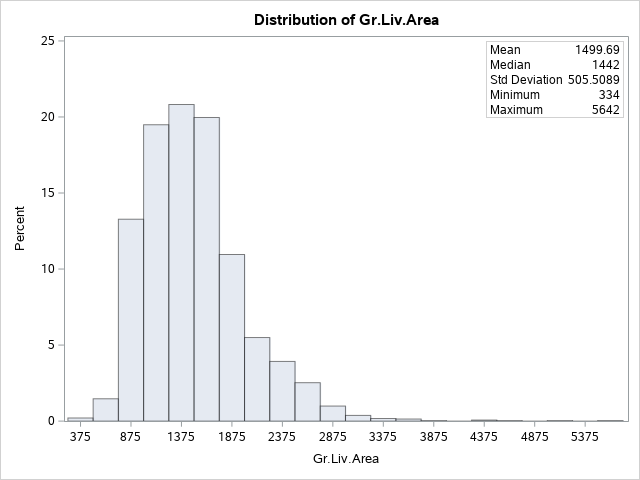

In [16]:
filename amesh url 'http://www.openintro.org/stat/data/ames_sas.csv';

proc import datafile=amesh out=work.ames dbms=csv replace;
   getnames=yes;
   guessingrows=max;
run;

proc univariate data=work.ames;
   var 'Gr.Liv.Area'n;
   histogram 'Gr.Liv.Area'n;
   inset mean median std min max / pos=ne;
   output out=estimates n=n mean=mean std=std;
run;


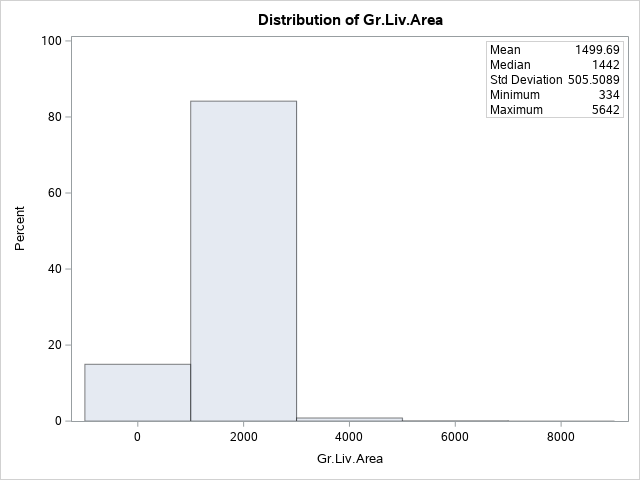

In [17]:
proc univariate data=work.ames;
   var 'Gr.Liv.Area'n;
   histogram 'Gr.Liv.Area'n / nmidpoints=5;
   inset mean median std min max / pos=ne;
run;

## Exercise 1:
### Describe this population distribution.


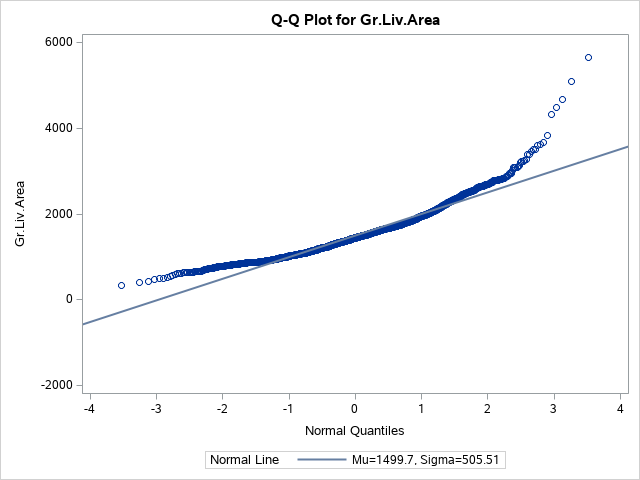

In [20]:
data _NULL_;
	set estimates;
	call symputx('n', n);
	call symputx('mean', mean);
	call symputx('std', std);
run;

ods select qqplot;
proc univariate data=work.ames;
	var 'Gr.Liv.Area'n;
	qqplot 'Gr.Liv.Area'n / normal(mu=&mean sigma=&std);
run;

The population has a mean of 1499.69044, a median of 1442 and a standard deviation of 505.508887. By plotting its histogram and normal probability plot, we can see that the distribution is approximately normal, although having a right tail(skewed to the right-positively).

## The Unknown Sampling Distribution

In [35]:
proc surveyselect data=work.ames out=work.amessample sampsize=50
                  method=srs ranuni;
run;

Selection Method,Simple Random Sampling
Input Data Set,AMES
Random Number Seed,586698717
Sample Size,50
Selection Probability,0.017065
Sampling Weight,58.6
Output Data Set,AMESSAMPLE


In [36]:
proc print data=work.amessample;
run;

Obs,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
1,25,527402250,20,RL,.,12537,Pave,,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1971,2008,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,GLQ,734,Unf,0,344,1078,GasA,Ex,Y,SBrkr,1078,0,0,1078,1,0,1,1,3,1,TA,6,Typ,1,Fa,Attchd,1971,Fin,2,500,TA,TA,Y,0,0,0,0,0,0,,,,0,4,2010,WD,Normal,149900
2,48,528176070,60,RL,105,13650,Pave,,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,232,Gd,TA,PConc,Gd,TA,Gd,GLQ,578,Unf,0,1093,1671,GasA,Ex,Y,SBrkr,1687,563,0,2250,1,0,2,1,3,1,Gd,7,Typ,1,Ex,Attchd,2002,Fin,3,756,TA,TA,Y,238,130,0,0,0,0,,,,0,6,2010,WD,Normal,320000
3,52,528218150,20,RL,100,18494,Pave,,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1324,1324,GasA,Ex,Y,SBrkr,1324,0,0,1324,0,0,2,0,3,1,Gd,6,Typ,0,,Attchd,2005,Fin,2,430,TA,TA,Y,36,23,0,0,0,0,,,,0,1,2010,WD,Normal,199500
4,126,534427010,90,RL,98,13260,Pave,,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144,TA,TA,CBlock,TA,TA,No,BLQ,1500,Unf,0,228,1728,GasA,TA,Y,SBrkr,1728,0,0,1728,2,0,2,0,6,2,TA,10,Typ,0,,,.,,0,0,,,Y,0,0,0,0,0,0,,,,0,1,2010,Oth,Abnorml,84900
5,262,907200340,20,RL,75,10650,Pave,,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1976,1976,Gable,CompShg,HdBoard,HdBoard,None,0,TA,TA,CBlock,TA,Gd,Av,LwQ,182,ALQ,712,0,894,GasA,TA,Y,SBrkr,894,0,0,894,1,0,1,0,3,1,TA,5,Typ,0,,Attchd,1976,Unf,1,308,TA,TA,Y,365,0,0,0,0,0,,MnPrv,,0,2,2010,WD,Normal,128200
6,421,528102040,20,RL,96,12456,Pave,,Reg,Lvl,AllPub,FR2,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2007,Hip,CompShg,CemntBd,CmentBd,Stone,230,Ex,TA,PConc,Ex,TA,Gd,GLQ,1172,Unf,0,528,1700,GasA,Ex,Y,SBrkr,1718,0,0,1718,1,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008,Fin,3,786,TA,TA,Y,216,48,0,0,0,0,,,,0,7,2009,WD,Normal,337500
7,499,528344100,60,RL,98,12203,Pave,,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1999,Hip,CompShg,VinylSd,VinylSd,BrkFace,975,Gd,TA,PConc,Gd,TA,No,GLQ,854,Unf,0,371,1225,GasA,Ex,Y,SBrkr,1276,1336,0,2612,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1998,Fin,3,676,TA,TA,Y,250,0,0,0,0,0,,,,0,7,2009,WD,Normal,336000
8,575,533252040,20,RL,.,14694,Pave,,IR1,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,8,9,1977,2008,Gable,CompShg,MetalSd,MetalSd,BrkFace,450,Ex,Ex,CBlock,Gd,Gd,Gd,GLQ,1252,ALQ,136,306,1694,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,2,1,Ex,5,Typ,1,Gd,Attchd,1977,Fin,2,642,TA,TA,Y,501,120,0,225,0,0,,,,0,6,2009,WD,Normal,318750
9,584,534128020,60,RL,.,12732,Pave,,IR1,Lvl,AllPub,CulDSac,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,Mn,GLQ,560,LwQ,42,150,752,GasA,TA,Y,SBrkr,1285,782,0,2067,0,0,2,1,3,1,Gd,7,Typ,2,TA,Attchd,1974,RFn,2,784,TA,TA,Y,297,40,0,0,0,0,,,,0,6,2009,WD,Normal,206000
10,604,534278070,20,RL,.,13495,Pave,,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1956,1956,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,70,TA,Gd,CBlock,TA,TA,No,BLQ,625,LwQ

## Exercise 2:
### Describe the distribution of this sample. How does it compare to the distribution of the population?

With a first look at the normal probability plot, we can say that the sample distribution can
be considered as an approximation of the normal distribution. We noticed that the sample’s
mean and standard deviation were close to the population’s ones. We could also say that
the sample’s distribution is more normal looking than that of the population. Of course,
another sample could be closer to the population’s distribution since the samples are
randomly taken.


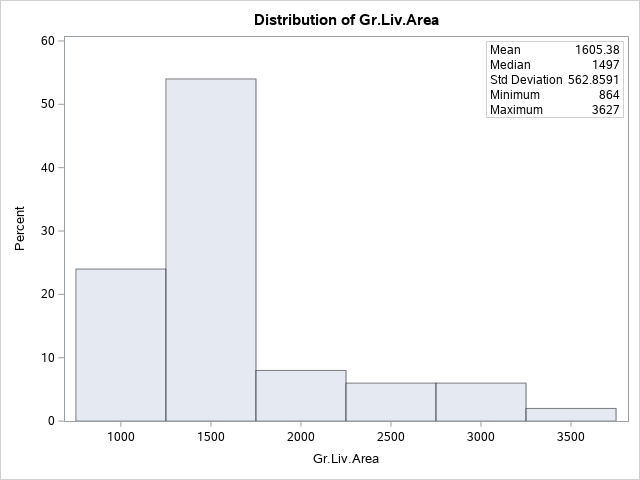

In [37]:
/*numerical summary and histogram of the sample*/
proc univariate data=work.amessample;
   var 'Gr.Liv.Area'n;
   histogram 'Gr.Liv.Area'n;
   inset mean median std min max / pos=ne;
   output out=estimates n=n mean=mean std=std;
run;


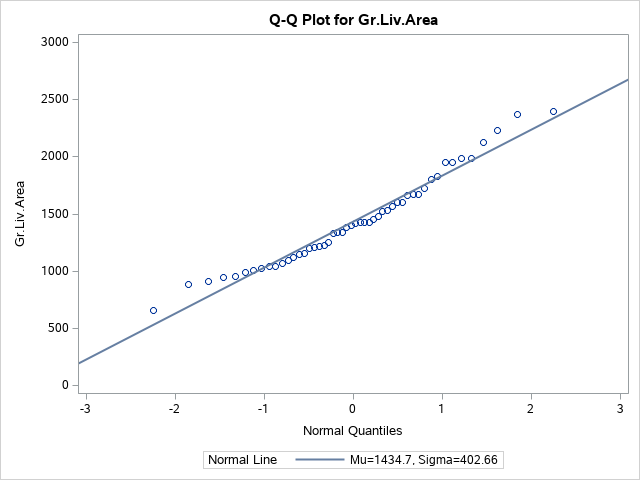

In [26]:
data _NULL_;
	set estimates;
	call symputx('n', n);
	call symputx('mean', mean);
	call symputx('std', std);
run;

/*normal probability plot of the sample*/
ods select qqplot;
proc univariate data=work.amessample;
	var 'Gr.Liv.Area'n;
	qqplot 'Gr.Liv.Area'n/ normal(mu=&mean sigma=&std);
run;

In [38]:
proc means data=work.amessample mean;
   var 'Gr.Liv.Area'n;
run;

Analysis Variable : Gr.Liv.Area
Mean
1605.38


By looking at the normal probability plot, we can say that the sample distribution can
be considered as an approximation of the normal distribution. We noticed that the sample’s
mean and standard deviation were close to the population’s ones. We could also say that
the sample’s distribution is more normal looking than that of the population. Of course,
another sample could be closer to the population’s distribution since the samples are
randomly taken.

## Exercise 3:
### Take a second sample, also of size 50, and call it work.amessample2. How does the mean of work.amessample2 compare with the mean of work.amessample? Suppose we took two more samples, one of size 100 and one of size 1000. Which would you think would provide a more accurate estimate of the population mean?

In [31]:
/*Another sample of size 50 */
proc surveyselect data=work.ames out=work.amessample2 sampsize=50
                  method=srs ranuni;
run;

/*Calculate the mean of the second sample */
proc means data=work.amessample2 mean;
   var 'Gr.Liv.Area'n;
run;

The mean of the new sample of size 50(work.amessample2) is 1613.76, which is about as accurate as the mean of the old sample(work.amessample), which is 1605.38.<br>
By taking a larger sample, we produce a more accurate representation of the total population. So, we would expect the mean of a sample of size 1000 to be closer to the population mean than the mean of a sample of size 100.

In [32]:
/*Another sample of size 100 */
proc surveyselect data=work.ames out=work.amessample100 sampsize=100
                  method=srs ranuni;
run;

/*Calculate the mean of the third sample */
proc means data=work.amessample100 mean;
   var 'Gr.Liv.Area'n;
run;

In [33]:
/*Another sample of size 1000 */
proc surveyselect data=work.ames out=work.amessample1000 sampsize=1000
                  method=srs ranuni;
run;

/*Calculate the mean of the fourth sample */
proc means data=work.amessample1000 mean;
   var 'Gr.Liv.Area'n;
run;

The mean of the sample of size 100(work.amessample100) is 1551.71, which is closer to the population mean than our previous samples that had a size of 50, as we expected.<br>
The sample of size 1000(work.amessample1000) has a mean of 1492.83, which is even closer to the population mean.<br>
Thus, our prediction that the larger the sample, the better the accuracy of the mean holds true.

In [40]:
proc surveyselect data=work.ames out=work.amessampler sampsize=50
                  method=srs reps=5000 ranuni;
run;

proc means data=work.amessampler mean noprint;
   by replicate;
   var 'Gr.Liv.Area'n;
   output out=work.reprun mean=sampmean;
run;

Selection Method,Simple Random Sampling
Input Data Set,AMES
Random Number Seed,298940728
Sample Size,50
Selection Probability,0.017065
Sampling Weight,58.6
Number of Replicates,5000
Total Sample Size,250000
Output Data Set,AMESSAMPLER



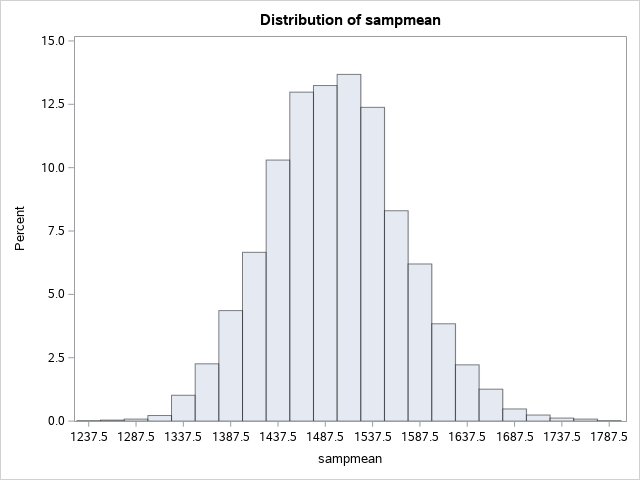

In [41]:
proc univariate data=work.reprun;
   var sampmean;
   histogram sampmean;
run;

 ## Exercise 4
 ### How many observations are there in work.reprun? Describe the sampling distribution, and be sure to specifically note its center. Would you expect the distribution to change if we instead collected 50,000 sample means?

In work.reprun are contained 5000 observations. Work.reprun has a mean of 1499.103, which is extremely close to the population’s mean and a standard deviation of 71.5901223.<br>
If we collected 50000 sample means, we would expect the distribution to be even closer to the normal distribution, which is actually the case, aswe can see below:

In [42]:
/*here we get 50000 samples of size 50 from the ames dataset */
proc surveyselect data=work.ames out=work.amessampler sampsize=50
                  method=srs reps=50000 ranuni;
run;

/*We calculate each sample's mean and put it in the amessampler set*/
proc means data=work.amessampler mean noprint;
   by replicate;
   var 'Gr.Liv.Area'n;
   output out=work.reprun mean=sampmean;
run;

Selection Method,Simple Random Sampling
Input Data Set,AMES
Random Number Seed,401746743
Sample Size,50
Selection Probability,0.017065
Sampling Weight,58.6
Number of Replicates,50000
Total Sample Size,2500000
Output Data Set,AMESSAMPLER



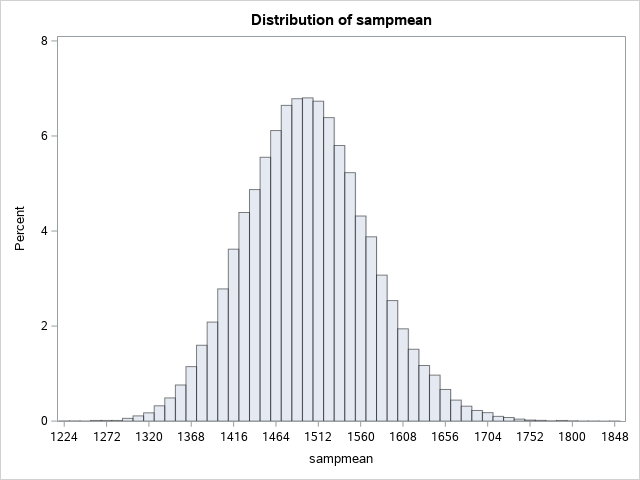

In [43]:
/* Here we demonstrate the distribution of the samples' means*/
proc univariate data=work.reprun;
   var sampmean;
   histogram sampmean;
run;

## Exercise 5:
### To make sure that you understand what you’ve done, try running a smaller version. This time, take only 100 samples of size 50 from the population. Change the data set by saving the sample means to work.reprunsmall. Print the storage data set to your screen.


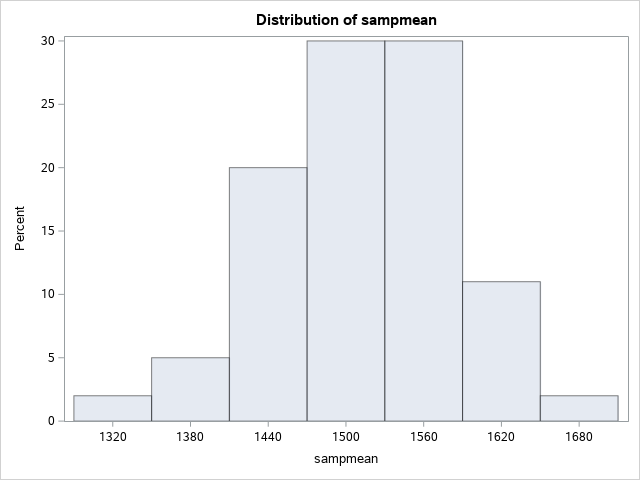

In [48]:
/*here we get 100 samples of size 50 from the ames dataset */
proc surveyselect data=work.ames out=work.amessampler sampsize=50
                  method=srs reps=100 ranuni;
run;

/*We calculate each sample's mean and put it in the amessampler set*/
proc means data=work.amessampler mean noprint;
   by replicate;
   var 'Gr.Liv.Area'n;
   output out=work.reprunsmall mean=sampmean;
run;

/* Here we demonstrate the distribution of the samples' means*/
proc univariate data=work.reprunsmall;
   var sampmean;
   histogram sampmean;
run;

/* print the storage data set */
proc print data=work.reprunsmall;
run;

## Sample Size and the Sampling Distribution


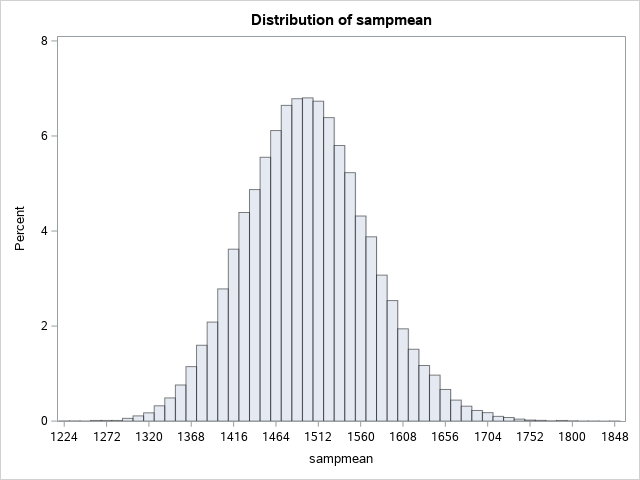

In [49]:
proc univariate data=work.reprun;
   var sampmean;
   histogram sampmean;
run;

In [52]:
proc surveyselect data=work.ames out=work.amessampler10 sampsize=10
                  method=srs reps=5000 ranuni;
run;

proc means data=work.amessampler10 mean noprint;
   by replicate;
   var 'Gr.Liv.Area'n;
   output out=work.reprun10 mean=sampmean;
run;

proc surveyselect data=work.ames out=work.amessampler100 sampsize=100
                  method=srs reps=5000 ranuni;
run;

proc means data=work.amessampler100 mean noprint;
   by replicate;
   var 'Gr.Liv.Area'n;
   output out=work.reprun100 mean=sampmean;
run;

Selection Method,Simple Random Sampling
Input Data Set,AMES
Random Number Seed,520896266
Sample Size,10
Selection Probability,0.003413
Sampling Weight,293
Number of Replicates,5000
Total Sample Size,50000
Output Data Set,AMESSAMPLER10
Selection Method,Simple Random Sampling
Input Data Set,AMES



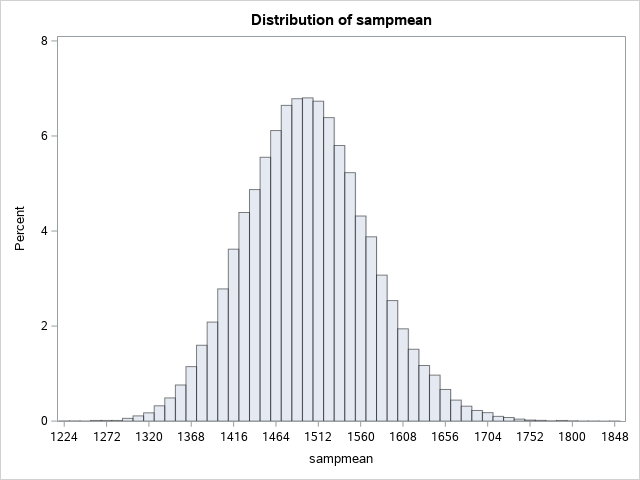
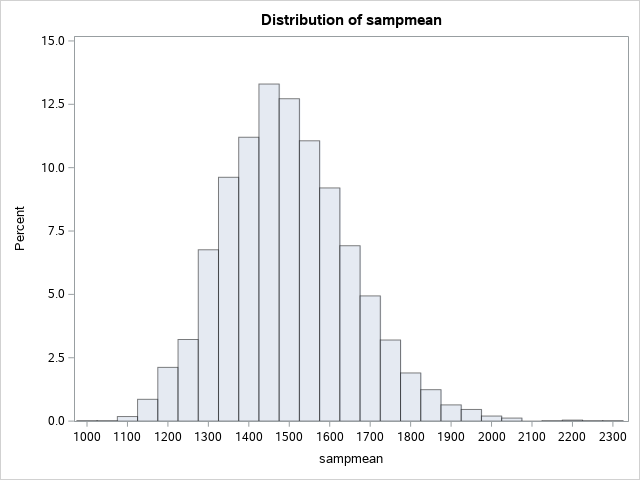
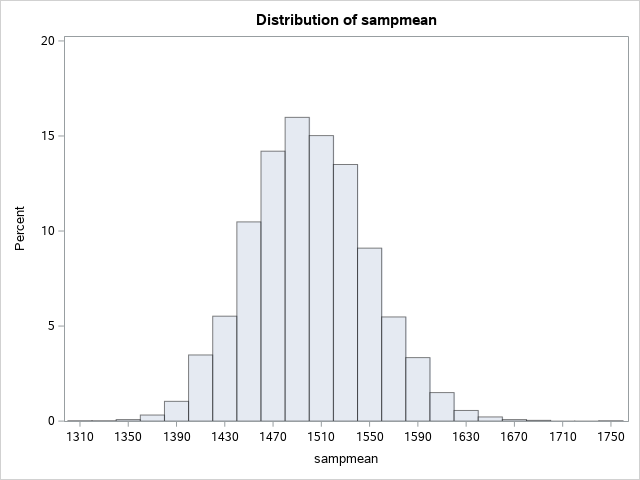

In [53]:
proc univariate data=work.reprun;
   title 'Sample Size = 50';
   var sampmean;
   histogram sampmean;
run;

proc univariate data=work.reprun10;
   title 'Sample Size = 10';
   var sampmean;
   histogram sampmean;
run;

proc univariate data=work.reprun100;
   title 'Sample Size = 100';
   var sampmean;
   histogram sampmean;
run;

title;


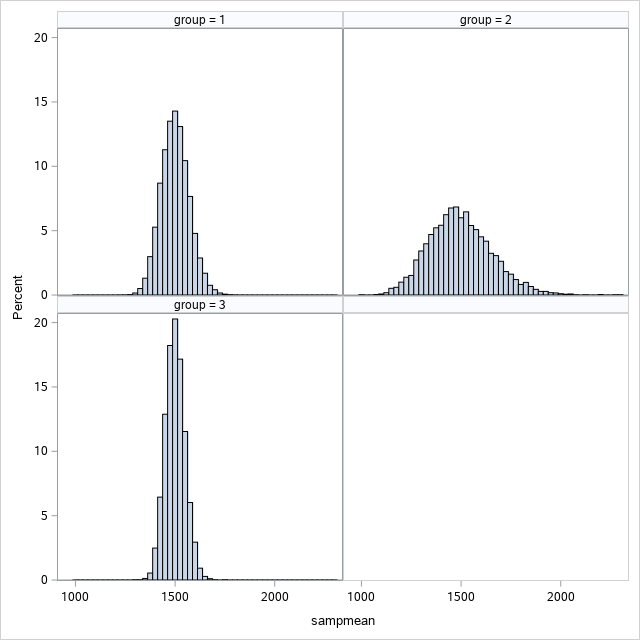

In [54]:
data work.allsamples;
   set work.reprun (IN=Sample1)
       work.reprun10 (IN=Sample2)
       work.reprun100 (IN=Sample3);
   group = 1*(Sample1) + 2*(Sample2) + 3*(Sample3);
run;
proc sgpanel data=work.allsamples;
   panelby group;
   histogram sampmean;
run;

## Exercise 6:
### When the sample size is larger, what happens to the center? What about the spread?

When the sample size gets bigger and bigger, we expect the center of its distribution to get
closer to the true mean of the population and its spread(its standard deviation) to decrease.
Bellow we can see the result of having 5000 samples of different sizes.
- In the upper and left distribution, which is for a sample of size 50, we can see that it has a mean of 1500.08715(which is really close to the true mean) and a standard deviation of 70.3953984.
- The upper right distribution, that is for samples of size 10 has a significantly larger spread(157.47378), and a mean of 1495.95386.
- The last is the distribution of the means of 5000 samples that had a size of 100. We immediately notice its smaller spread(has a
standard deviation of 49.227301) and its, closest to the true, mean of 1499.94098.

As a result, when the size of the samples is increasing, the center of the sample means’
distribution approaches the true mean of the population. Also, as the sample size increases,
the standard deviation is decreasing, thus the distribution’s spread is getting smaller.

## On Your Own

### 1. Take a random sample of size 50 for SalePrice. Using this sample, what is your best point estimate of the population mean?


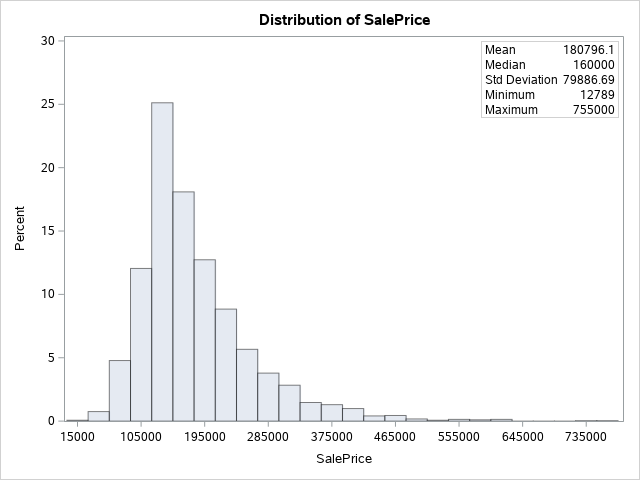

In [58]:
proc univariate data=work.ames;
   var SalePrice;
   histogram SalePrice;
   inset mean median std min max / pos=ne;
   output out=estimates n=n mean=mean std=std;
run;


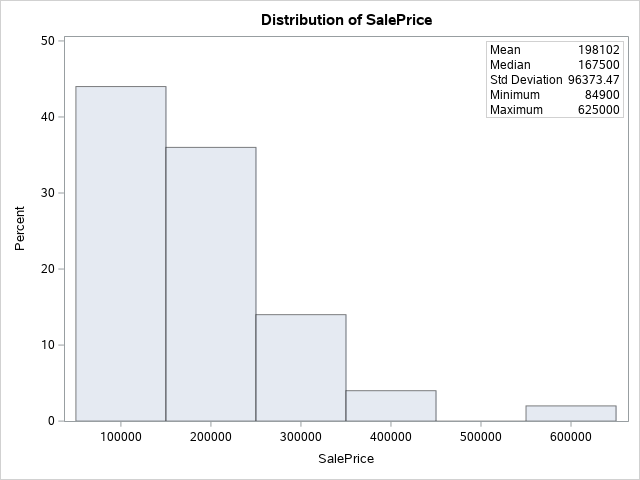

In [57]:
/*here we take a sample of size 50 containing SalePrices*/
proc univariate data=work.amessample;
   var SalePrice;
   histogram SalePrice;
   inset mean median std min max / pos=ne;
   output out=estimates n=n mean=mean std=std;
run;

The true mean of the population is  180796.1.<br>
The mean of the sample that we took is 198102.

### 2. Because you have access to the population, simulate the sampling distribution for x¯ price by taking 5000 samples from the population of size 50 and computing 5000 sample means. Update the code to account for changing the variable in question. Name the storage data set work.repprice. Plot the data and then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of this population to be? Finally, calculate and report the population mean.


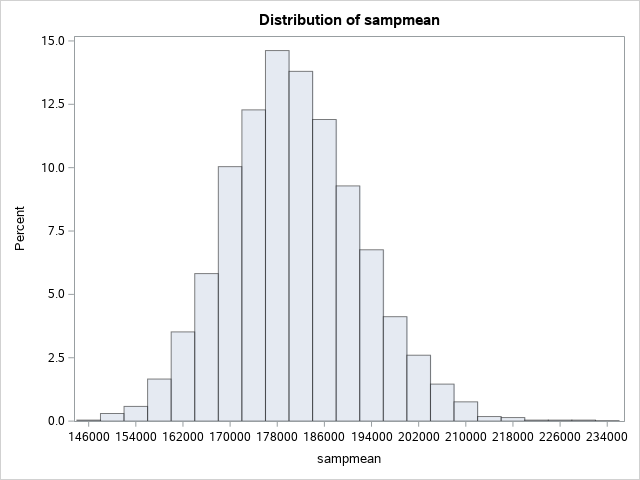

In [59]:
proc surveyselect data=work.ames out=work.amessampler sampsize=50
                  method=srs reps=5000 ranuni;
run;

proc means data=work.amessampler mean noprint;
   by replicate;
   var SalePrice;
   output out=work.repprice mean=sampmean;
run;

proc univariate data=work.repprice;
   var sampmean;
   histogram sampmean;
run;

We plotted the distribution of the samples’ means and we see that it is almost perfectly normal.
From the distribution, we expect the mean to be around 180000. In fact, the mean of our
distribution has a mean of 180868.9 while the population mean is 180796.1.

### 3. Change your sample size from 50 to 150, and then compute the sampling distribution using the same method as above. Store these means in a new data set named work.repprice150. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 50. Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?


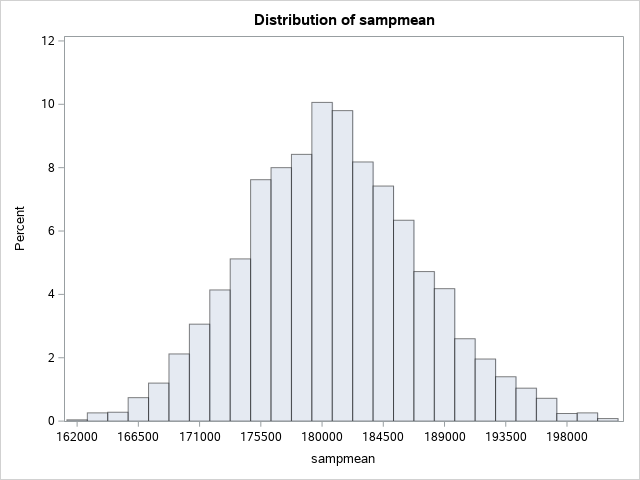

In [60]:
proc surveyselect data=work.ames out=work.amessampler sampsize=150
                  method=srs reps=5000 ranuni;
run;

proc means data=work.amessampler mean noprint;
   by replicate;
   var SalePrice;
   output out=work.repprice150 mean=sampmean;
run;

proc univariate data=work.repprice150;
   var sampmean;
   histogram sampmean;
run;

Based on the distribution, we once again expect the true mean to be somewhat around
1800000(maybe more). This distribution has a mean of 180754.403 and a standard deviation of
6380.53877(smaller than the standard deviation of the previous distribution). As we see, it is
approximately normal and surely more “compact” than that of the samples with size 50. To our
surprise, samples with size 50 had a mean closer to the true one.

### 4. Of the sampling distributions from 2 and 3, which has a smaller spread? If we’re concerned with making estimates that are more often close to the true value, would we prefer a distribution with a large or small spread?

Of the two distributions, the second had a smaller spread. The reason of that smaller spread is
that the sample was bigger and thus the standard deviation smaller. By having samples of larger
sizes, we can make estimates closer to the true value, so we will prefer a distribution with a
small spread.